In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functionsUtils import load_results

plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')

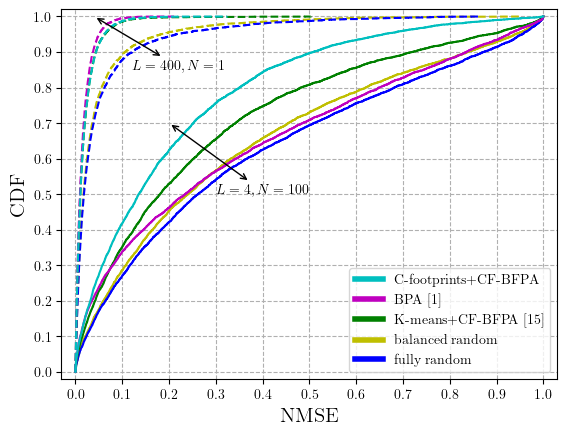

In [3]:
results = load_results('./VARIABLES_SAVED/NMSE_CDF_K_100_NbrSetps_50.pkl')


setups = [(4, 100), (9, 36), (100, 4), (400, 1)]

Kmeans_L_4 = results['Kmeans_locations'][0, :]
Kmeans_L_9 = results['Kmeans_locations'][1, :]
Kmeans_L_100 = results['Kmeans_locations'][2, :]
Kmeans_L_400 = results['Kmeans_locations'][3, :]

Kfootprints_L_4 = results['Kfootprints'][0, :]
Kfootprints_L_9 = results['Kfootprints'][1, :]
Kfootprints_L_100 = results['Kfootprints'][2, :]
Kfootprints_L_400 = results['Kfootprints'][3, :]

DCC_L_4 = results['DCC'][0, :]
DCC_L_9 = results['DCC'][1, :]
DCC_L_100 = results['DCC'][2, :]
DCC_L_400 = results['DCC'][3, :]

DCPA_L_4 = results['DCPA'][0, :]
DCPA_L_9 = results['DCPA'][1, :]
DCPA_L_100 = results['DCPA'][2, :]
DCPA_L_400 = results['DCPA'][3, :]

balanced_random_L_4 = results['balanced_random'][0, :]
balanced_random_L_9 = results['balanced_random'][1, :]
balanced_random_L_100 = results['balanced_random'][2, :]
balanced_random_L_400 = results['balanced_random'][3, :]

random_L_4 = results['random'][0, :]
random_L_9 = results['random'][1, :]
random_L_100 = results['random'][2, :]
random_L_400 = results['random'][3, :]

fig, ax = plt.subplots()
plt.grid(visible = True, linestyle='--')

plt.ecdf(DCPA_L_4, label="DCPA ($L = 4, N = 100$)", color='r')
plt.ecdf(DCPA_L_400, label="DCPA ($L = 400, N = 1$)", color='r', linestyle='--')
plt.ecdf(balanced_random_L_4, label="balanced random ($L = 4, N = 100$)", color='y')
plt.ecdf(balanced_random_L_400, label="balanced random ($L = 400, N = 1$)", color='y', linestyle='--')
plt.ecdf(random_L_4, label="random ($L = 4, N = 100$)", color='b')
plt.ecdf(random_L_400, label="random ($L = 400, N = 1$)", color='b', linestyle='--')
plt.ecdf(Kmeans_L_4, label="K-means+BFPA ($L = 4, N = 100$)", color='g')
plt.ecdf(Kmeans_L_400, label="K-means+BFPA ($L = 400, N = 1$)", color='g', linestyle='--')
plt.ecdf(DCC_L_4, label="DCC ($L = 4, N = 100$)", color='m')
plt.ecdf(DCC_L_400, label="DCC ($L = 400, N = 1$)", color='m', linestyle='--')
plt.ecdf(Kfootprints_L_4, label=r"K-footprints+BFPA ($L = 4, N = 100$)", color='c')
plt.ecdf(Kfootprints_L_400, label="K-footprints+BFPA ($L = 400, N = 1$)", color='c', linestyle='--')


plt.yticks(np.arange(0, 1.10, step=0.1))
plt.xticks(np.arange(0, 1.10, step=0.1))

plt.xlabel(r'NMSE', size=15)
plt.ylabel(r'CDF', size=15)

plt.ylim(-0.02,1.02)
plt.xlim(-0.03,1.03)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='b', lw=4)]


ax.legend(custom_lines, ['C-footprints+CF-BFPA', 'BPA [1]', 'K-means+CF-BFPA [15]', 'DCPA [10]',  'balanced random', 'fully random'], fontsize=10)
# plt.legend(fontsize=10)

plt.annotate(# Label and coordinate
r'$L = 400, N = 1$', xy=(0.04, 1), xytext=(0.12, 0.85), size = 10,# Custom arrow
arrowprops=dict(facecolor='black', arrowstyle='<->'))

plt.annotate(# Label and coordinate
r'$L = 4, N = 100$', xy=(0.2, 0.7), xytext=(0.3, 0.5), size = 10,# Custom arrow
arrowprops=dict(facecolor='black', arrowstyle='<->'))

plt.draw()
plt.show()

image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'NMSEs_CDF_L_N.pdf'
fig.savefig(image_name, format=image_format, dpi=400)
